In [108]:
import pandas as pd
import scipy.stats as stats
import numpy as np

import matplotlib as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [109]:
# load up all the raw data from all the KARS conditions (Baseline, label, supervised )

df = pd.read_pickle('dfBehavKARSAll.p')

In [110]:
df['logRT'] = np.log( df.RT)

# start looking from 2nd block, only accurate, unlabled trials for children
dfNoLabOnlyCorrect = df[ (df.isLabeled == False) & (df.ageGrps != 'Adult') & (df.pracBlock > 1)] # & (df.acc == 1) ]  

dfCorrectBySub= dfNoLabOnlyCorrect.groupby(['ageGrps', 'condLab', 'subid']).mean().reset_index()
dfCorrectByCond= dfNoLabOnlyCorrect.groupby(['ageGrps', 'condLab']).mean()
# dfCorrectBySub

In [116]:
# Check for RT differences
# 
# get natural log(RT) for the different conditions
print( 'Checking for differences of log(RT)')
for age in ['group3', 'group2']:
    grps = []
    for cond in [0,1,2]:
        grps.append( dfCorrectBySub[(dfCorrectBySub.condLab == cond) & (dfCorrectBySub.ageGrps == age )].logRT) 

    f_val,p_val = stats.f_oneway( *grps)
    print( 'Age %s, One way ANOVA, f-val=%.4f,  p-val=%.4f' %(age, f_val, p_val)  )
    

Checking for differences of log(RT)
Age group3, One way ANOVA, f-val=0.0899,  p-val=0.9142
Age group2, One way ANOVA, f-val=0.1093,  p-val=0.8968


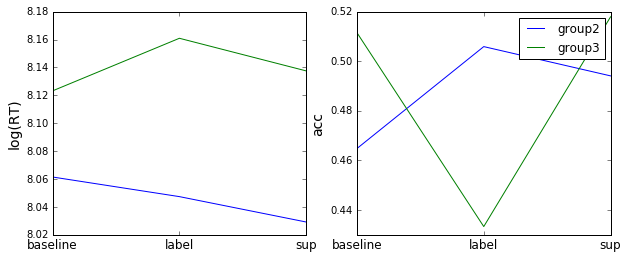

In [112]:
figure( 1, figsize=(10,4))

for age in [ 'group2', 'group3' ]:
    x = dfCorrectBySub[dfCorrectBySub.ageGrps == age ].groupby(['condLab' ]).mean().reset_index()
    subplot(121)
    plot( x.condLab, x.logRT, label=age)
    subplot(122)    
    plot( x.condLab, x.acc, label=age)


subplot(121)    
xticks([0,1,2], ['baseline', 'label', 'sup'], fontsize=12)
ylabel( 'log(RT)', fontsize=14)

subplot(122)
xticks([0,1,2], ['baseline', 'label', 'sup'], fontsize=12)
ylabel( 'acc', fontsize=14)
legend()

# for cond in [0,1,2]:
#     grps.append( dfCorrectBySub[(dfCorrectBySub.condLab == cond) & (dfCorrectBySub.ageGrps == age )].logRT) 


In [113]:
x

,condLab,subid,trial,block,acc,RT,age,lookLoc,isLabeled,pracBlock,peakBlock,maxBlock,windAcc,isLearner,pVal,logRT
0,0,4786.615385,29.463466,3.233476,0.511503,3752.611409,21.769231,1.459712,False,3.233476,1.615385,2.461538,0.522042,0.230769,0.085082,8.123182
1,1,4876.444444,28.847477,2.795075,0.433323,3890.498804,20.111111,1.544455,False,2.795075,1.222222,1.222222,0.466583,0.000000,0.186347,8.160877
2,2,5078.375000,29.266222,2.865691,0.517895,3616.004040,21.812500,1.590128,False,2.865691,1.250000,1.250000,0.789457,0.062500,0.183297,8.137487


In [114]:
# output the accuracy information for further analysis
dfNoLabOnlyCorrect[ dfNoLabOnlyCorrect.ageGrps != 'group1'].dropna().to_csv('dfNoLabCorrectGrps12.txt',sep=',')

In [115]:
# output the number of participants per condition and age group
print( "Number of participants per condition and age group")
print dfCorrectBySub.groupby(['condLab', 'ageGrps']).count()['subid']

# output the average ages
print( "\naverage age in months")
print dfCorrectBySub.groupby(['condLab', 'ageGrps']).mean()['age']


Number of participants per condition and age group
condLab  ageGrps
0        group1      5
         group2      9
         group3     13
1        group1     16
         group2     12
         group3      9
2        group2     13
         group3     16
Name: subid, dtype: int64

average age in months
condLab  ageGrps
0        group1      8.200000
         group2     15.333333
         group3     21.769231
1        group1      8.625000
         group2     12.833333
         group3     20.111111
2        group2     13.692308
         group3     21.812500
Name: age, dtype: float64
